## Random Forest

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Time series jason brownlee.xlsx')
df.set_index('Timestamp',inplace=True)
df = df.rename(columns={'BAIRRO ALTO -  / FREQ B1': 'FREQUENCIA BOMBA 1', 'BAIRRO ALTO -  / FREQ B2': 'FREQUENCIA BOMBA 2','BAIRRO ALTO -  / FREQ B3':'FREQUENCIA BOMBA 3','BAIRRO ALTO - LT01 / NÍVEL':'NIVEL DO RESERVATÓRIO - LT01','BAIRRO ALTO - FT01 / ENT IRAI':'VAZÃO DE ENTRADA- FT01','BAIRRO ALTO - FT02 / GBAL':'VAZÃO DE GRAVIDADE - FT02','BAIRRO ALTO - FT03 / RBAL':'VAZÃO DE RECALQUE - FT03','BAIRRO ALTO - PT01 / SUCÇÃO':'PRESSÃO DE SUCÇÃO - PT01','BAIRRO ALTO - PT02 / RBAL':'PRESSÃO DE RECALQUE - PT02'})
df.replace(to_replace='Bad', value=np.nan, inplace=True)
df.interpolate(inplace=True)
df = df.resample('24H').mean().reset_index()

In [3]:
df.set_index('Timestamp',inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02
Timestamp,,,,,,,,,
2018-01-01,45.727617,0.916126,0.000000,4.085868,164.094190,96.566326,78.387204,5.195563,16.064507
2018-01-02,47.239316,0.000000,0.000000,3.942272,181.728099,112.688852,84.923583,5.017492,15.573998
2018-01-03,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076
2018-01-04,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601
2018-01-05,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912


In [4]:
# definindo 1 passo à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead1 = 1
lags = 3 # tirar dúvida com a Vivi

In [5]:
colunas = df.columns

for lag in range(1, lags):
    for column in colunas:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [6]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead1)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2,FREQUENCIA BOMBA 2_t-2,FREQUENCIA BOMBA 3_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2,VAZÃO DE ENTRADA- FT01_t-2,VAZÃO DE GRAVIDADE - FT02_t-2,VAZÃO DE RECALQUE - FT03_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2,PRESSÃO DE RECALQUE - PT02_t-2,y
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-03,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076,47.239316,...,45.727617,0.916126,0.000000,4.085868,164.094190,96.566326,78.387204,5.195563,16.064507,3.912685
2018-01-04,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601,48.112157,...,47.239316,0.000000,0.000000,3.942272,181.728099,112.688852,84.923583,5.017492,15.573998,3.389542
2018-01-05,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912,49.869415,...,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076,3.787355
2018-01-06,52.575690,0.000000,18.076194,3.787355,209.129580,107.606394,93.396580,4.823002,20.695101,37.037886,...,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601,4.002495
2018-01-07,48.340235,0.000000,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,52.575690,...,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912,3.945957


In [7]:
df_train = df.iloc[:-test_size, :]
df_test = df.iloc[-test_size:, :]

In [8]:
X_train = df_train.drop(['y'], axis=1)
y_train = df_train['y']
X_test = df_test.drop(['y'], axis=1)
y_test = df_test['y']

In [9]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [10]:
model=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [11]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=0)

In [12]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

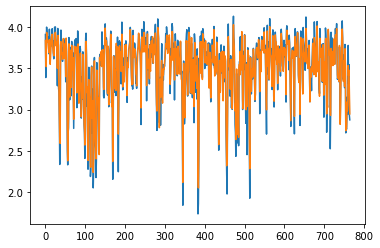

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_train.values, label='y_train')
plt.plot(y_hat_train, label='y_hat_train')

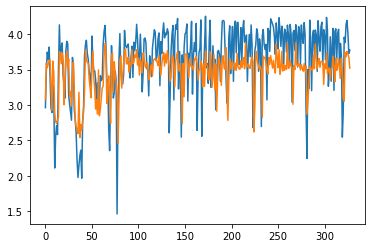

In [17]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_hat_test, label='y_hat_test')

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score

In [15]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train=np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test=np.sqrt(mean_squared_error(y_test, y_hat_test))
mae_train=mean_absolute_error(y_train, y_hat_train)
mae_test=mean_absolute_error(y_test, y_hat_test)
mape_train = int((np.mean(np.abs((y_train - y_hat_train) / y_train)) * 100))
mape_test = int((np.mean(np.abs((y_test - y_hat_test) / y_test)) * 100))
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

In [16]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train, mse_test))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train, mape_test))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train, mae_test))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train, rmse_test))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train, r2_test))

MSE train: 0.011, MSE test: 0.171
MAPE train: 2.000, MAPE test: 9.000
MAE train: 0.076, MAE test: 0.341
RMSE train: 0.105, RMSE test: 0.413
R2 train: 0.934, R2 test: 0.290


In [ ]:
## 7 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead7 = 7
lags = 3

In [ ]:
colunas7 = df.columns

for lag in range(1, lags):
    for column in colunas7:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [ ]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead7)
df.dropna(axis=0, inplace=True)
df.head()

In [ ]:
df_train7 = df.iloc[:-test_size, :]
df_test7 = df.iloc[-test_size:, :]

In [ ]:
X_train7 = df_train7.drop(['y'], axis=1)
y_train7 = df_train7['y']
X_test7 = df_test7.drop(['y'], axis=1)
y_test7 = df_test7['y']

In [ ]:
model7=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [ ]:
model7.fit(X_train7, y_train7)

In [ ]:
y_hat_train7 = model7.predict(X_train7)
y_hat_test7 = model7.predict(X_test7)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train7.values, label='y_train')
plt.plot(y_hat_train7, label='y_hat_train')

In [ ]:
mse_train7 = mean_squared_error(y_train7, y_hat_train7)
mse_test7 = mean_squared_error(y_test7, y_hat_test7)
rmse_train7=np.sqrt(mean_squared_error(y_train7, y_hat_train7))
rmse_test7=np.sqrt(mean_squared_error(y_test7, y_hat_test7))
mae_train7=mean_absolute_error(y_train7, y_hat_train7)
mae_test7=mean_absolute_error(y_test7, y_hat_test7)
mape_train7 = int((np.mean(np.abs((y_train7 - y_hat_train7) / y_train7)) * 100))
mape_test7 = int((np.mean(np.abs((y_test7 - y_hat_test7) / y_test7)) * 100))
r2_train7 = r2_score(y_train7, y_hat_train7)
r2_test7 = r2_score(y_test7, y_hat_test7)

In [ ]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train7, mse_test7))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train7, mape_test7))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train7, mae_test7))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train7, rmse_test7))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train7, r2_test7))

In [ ]:
# 14 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead14 = 14
lags = 3

In [ ]:
colunas14 = df.columns

for lag in range(1, lags):
    for column in colunas14:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [ ]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead14)
df.dropna(axis=0, inplace=True)
df.head()

In [ ]:
df_train14 = df.iloc[:-test_size, :]
df_test14 = df.iloc[-test_size:, :]

In [ ]:
X_train14 = df_train14.drop(['y'], axis=1)
y_train14 = df_train14['y']
X_test14 = df_test14.drop(['y'], axis=1)
y_test14 = df_test14['y']

In [ ]:
model14=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [ ]:
model14.fit(X_train14, y_train14)

In [ ]:
y_hat_train14 = model14.predict(X_train14)
y_hat_test14 = model14.predict(X_test14)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train14.values, label='y_train')
plt.plot(y_hat_train14, label='y_hat_train')

In [ ]:
mse_train14 = mean_squared_error(y_train14, y_hat_train14)
mse_test14 = mean_squared_error(y_test14, y_hat_test14)
rmse_train14=np.sqrt(mean_squared_error(y_train14, y_hat_train14))
rmse_test14=np.sqrt(mean_squared_error(y_test14, y_hat_test14))
mae_train14=mean_absolute_error(y_train14, y_hat_train14)
mae_test14=mean_absolute_error(y_test14, y_hat_test14)
mape_train14 = int((np.mean(np.abs((y_train14 - y_hat_train14) / y_train14)) * 100))
mape_test14 = int((np.mean(np.abs((y_test14 - y_hat_test14) / y_test14)) * 100))
r2_train14 = r2_score(y_train14, y_hat_train14)
r2_test14 = r2_score(y_test14, y_hat_test14)

In [ ]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train14, mse_test14))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train14, mape_test14))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train14, mae_test14))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train14, rmse_test14))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train14, r2_test14))

In [ ]:
## 30 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead30 = 30
lags = 3

In [ ]:
colunas30 = df.columns

for lag in range(1, lags):
    for column in colunas30:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [ ]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead30)
df.dropna(axis=0, inplace=True)
df.head()

In [ ]:
df_train30 = df.iloc[:-test_size, :]
df_test30 = df.iloc[-test_size:, :]

In [ ]:
X_train30 = df_train30.drop(['y'], axis=1)
y_train30 = df_train30['y']
X_test30 = df_test30.drop(['y'], axis=1)
y_test30 = df_test30['y']

In [ ]:
model30=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [ ]:
model30.fit(X_train30, y_train30)

In [ ]:
y_hat_train30 = model30.predict(X_train30)
y_hat_test30 = model30.predict(X_test30)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train30.values, label='y_train')
plt.plot(y_hat_train30, label='y_hat_train')

In [ ]:
mse_train30 = mean_squared_error(y_train30, y_hat_train30)
mse_test30 = mean_squared_error(y_test30, y_hat_test30)
rmse_train30=np.sqrt(mean_squared_error(y_train30, y_hat_train30))
rmse_test30=np.sqrt(mean_squared_error(y_test30, y_hat_test30))
mae_train30=mean_absolute_error(y_train30, y_hat_train30)
mae_test30=mean_absolute_error(y_test30, y_hat_test30)
mape_train30 = int((np.mean(np.abs((y_train30 - y_hat_train30) / y_train30)) * 100))
mape_test30 = int((np.mean(np.abs((y_test30- y_hat_test30) / y_test30)) * 100))
r2_train30 = r2_score(y_train30, y_hat_train30)
r2_test30 = r2_score(y_test30, y_hat_test30)

In [ ]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train30, mse_test30))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train30, mape_test30))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train30, mae_test30))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train30, rmse_test30))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train30, r2_test30))

In [ ]:
df_train.head()

In [ ]:
df_train7.head()

In [ ]:
## Gráfico comparando o horizonte de previsão no X-gboost

plt.figure(figsize=(10,6))
plt.plot(y_train.values, label='y_train', color='blue')
plt.plot(y_hat_train, label='y_hat_train',color='black')
plt.plot(y_hat_train7, label='y_hat_train', color='green')
plt.plot(y_hat_train14, label='y_hat_train',color='red')
plt.plot(y_hat_train30, label='y_hat_train',color='grey')
plt.legend(['Série original','1 passo à frente','7 passos à frente','14 passos à frente','30 passos à frente'])

In [ ]:
## Gráfico comparando o horizonte de previsão no X-gboost

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='y_train', color='blue')
plt.plot(y_hat_test, label='y_hat_train',color='black')
plt.plot(y_hat_test7, label='y_hat_train', color='green')
plt.plot(y_hat_test14, label='y_hat_train',color='red')
plt.plot(y_hat_test30, label='y_hat_train',color='grey')
plt.legend(['Série original','1 passo à frente','7 passos à frente','14 passos à frente','30 passos à frente'])